In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/general_data.csv", sep=";")
customer_data = pd.read_csv("../population-segmentation-data/customer_data.csv", sep=";")
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";")
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";")

In [3]:
train_data.head()

,Unnamed: 0,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,...,6.0,4.0,2.0,-1.0,9.0,2.0,3,0,1,4
3,3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [4]:
# Getting the name of the extra column
extra_col = list(general_data.columns)[0]
print(extra_col)

# Removing the extra column in every dataframe since it is redundant
general_data.drop(extra_col, axis=1, inplace=True)
customer_data.drop(extra_col, axis=1, inplace=True)
train_data.drop(extra_col, axis=1, inplace=True)
test_data.drop(extra_col, axis=1, inplace=True)

Unnamed: 0


In [5]:
train_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,6.0,4.0,2.0,-1.0,9.0,2.0,3,0,1,4
3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


(array([42419.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   532.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

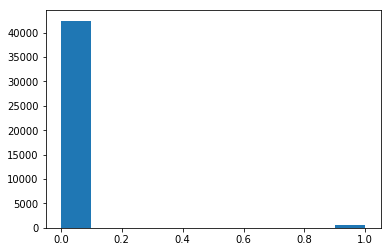

In [8]:
# Graphing the distribution of the RESPONSE variable for the training data
plt.hist(train_data["RESPONSE"])

In [10]:
# Calculating the percentage of positive outcomes for the training data
len(train_data[train_data["RESPONSE"]==1]) / len(train_data)

0.01238620753882331

In [27]:
# Using logistic regrsssion to create the benchmark model

# importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression model with lasso regularization
lr_baseline = LogisticRegression(penalty='l1',
                                 class_weight='balanced',
                                 solver='saga',
                                 max_iter=5000)

In [28]:
# Splitting the training data into features and labels
X_train = train_data.loc[:, train_data.columns != 'RESPONSE']
y_train = train_data['RESPONSE']

In [29]:
# Training the baseline model
lr_baseline.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Importing functions for calculating accuracy, precision, and recall
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [32]:
# Getting predictions for the training set
y_pred = lr_baseline.predict(X_train)

In [34]:
# Calculating the accuracy, precision, and recall
print("The accuracy is", accuracy_score(y_train, y_pred))
print("The recall is", recall_score(y_train, y_pred))
print("The precision is", precision_score(y_train, y_pred))

The accuracy is 0.7422877232194827
The recall is 0.5883458646616542
The precision is 0.028039057601003316


In [36]:
# Viewing the coefficents learned by the model
coefs = lr_baseline.coef_
print(coefs)

[[ 1.84895699e-01 -2.04611320e-01 -2.17930876e-02 -9.34123562e-02
  -1.47789463e-01  9.83639630e-02  1.87580989e-01  5.85593227e-02
   1.31786368e-01  3.70159316e-02 -1.02957909e-03  1.08466262e-01
  -1.56300751e-01 -1.61841914e-02 -1.53293236e-01 -1.26176171e-01
   8.60911702e-02 -1.99392939e-02  4.33759416e-02  3.54537886e-02
   7.45326069e-02 -4.53636676e-02  2.38866279e-02  5.38058758e-02
   1.10520677e-01 -3.13243989e-01 -1.63980907e-02 -2.39478481e-01
   8.86674232e-02 -9.81535701e-02  1.61357545e-01 -1.17411702e-01
   1.61681966e-01 -9.17613016e-02 -1.53396896e-01 -3.24113591e-03
  -7.91842111e-02 -7.86413872e-02 -6.16696850e-02  1.51376709e-01
   5.48142841e-02 -9.94606341e-02 -1.17146242e-01 -1.29384222e-01
   3.06035809e-01 -1.18380119e-01  1.26115330e-01  3.16935001e-03
   9.46991004e-02  4.42874731e-02 -1.24182868e-01 -4.81138212e-01
  -9.75865855e-01  8.54979210e-02 -8.31818721e-02 -1.11976916e-01
   1.08976272e-01 -1.67458636e-01  1.08795560e-01  5.00822925e-02
  -7.83537

In [38]:
print(len(coefs[0]))

358


In [39]:
# Splitting the training data into train and test to get an idea of the variance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)
print(X_test.shape)

(4296, 358)


In [51]:
# Creating an random forest model with untuned hyperparameters

# Importing the random forest model from scikit learn
from sklearn.ensemble import RandomForestClassifier

# Creating the random forest model
rf_classifier = RandomForestClassifier(n_estimators=200,
                                       oob_score=True,
                                       class_weight={0:0.1, 1:0.9})

In [52]:
# Training the random forest model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [53]:
# Calculating the accuracy, precision, and recall for the training set
y_pred = rf_classifier.predict(X_train)

print("The accuracy is", accuracy_score(y_train, y_pred))
print("The recall is", recall_score(y_train, y_pred))
print("The precision is", precision_score(y_train, y_pred))

The accuracy is 0.9984219376536024
The recall is 0.8747433264887063
The precision is 1.0


In [54]:
# Getting the out of bag score
print(rf_classifier.oob_score_)

0.987375501228819


In [55]:
# Calculating the evaluation metrics for the test data
y_pred = rf_classifier.predict(X_test)

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))

The accuracy is 0.9895251396648045
The recall is 0.0
The precision is 0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
len(train_data[train_data["RESPONSE"]==1])

532

In [57]:
len(train_data[train_data["RESPONSE"]==0])

42419

In [58]:
42419 / 532

79.73496240601504